In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras

In [3]:
# 데이터셋 로딩
raw_data = pd.read_csv("/Users/jk/git/Study/Data/kaggle_dataset/credit_fraud/creditcard.csv")
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## 데이터 전처리 1 - 데이터 확인
### 컬럼의 데이터 갯수, 타입, 데이터 값의 범위, label, 불균형도 확인
### data.info(), data.head(), data.shape, data.라벨.value_counts()

In [6]:
raw_data.shape   #  (284807, 31)
raw_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
# 불균형도 체크
raw_data.Class.value_counts()
print(len(raw_data[raw_data["Class"] == 1]) / len(raw_data) * 100)   # fraud 데이터의 비율은 0.172 %

0.1727485630620034


In [41]:
data_cols = raw_data.columns

for name in data_cols[:-1]:
    print(raw_data[name].describe())

count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64
count    2.848070e+05
mean     1.168375e-15
std      1.958696e+00
min     -5.640751e+01
25%     -9.203734e-01
50%      1.810880e-02
75%      1.315642e+00
max      2.454930e+00
Name: V1, dtype: float64
count    2.848070e+05
mean     3.416908e-16
std      1.651309e+00
min     -7.271573e+01
25%     -5.985499e-01
50%      6.548556e-02
75%      8.037239e-01
max      2.205773e+01
Name: V2, dtype: float64
count    2.848070e+05
mean    -1.379537e-15
std      1.516255e+00
min     -4.832559e+01
25%     -8.903648e-01
50%      1.798463e-01
75%      1.027196e+00
max      9.382558e+00
Name: V3, dtype: float64
count    2.848070e+05
mean     2.074095e-15
std      1.415869e+00
min     -5.683171e+00
25%     -8.486401e-01
50%     -1.984653e-02
75%      7.433413e-01
max      1.687534e+01
Name: V4, 

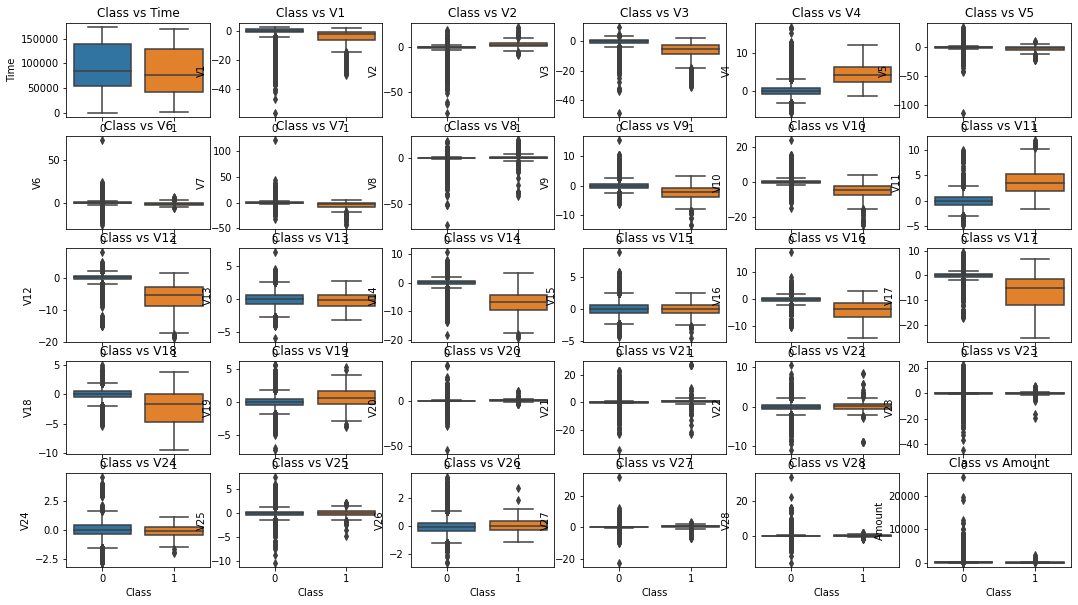

In [38]:
# 값의 범위
data_cols = raw_data.columns
fig, ax = plt.subplots(5, 6, figsize=(18, 10))
for idx, name in enumerate(data_cols[:-1]):
    i = idx // 6
    j = idx % 6
    sns.boxplot(x="Class", y=name, data=raw_data, ax=ax[i][j])
    ax[i][j].set_title("Class vs " + name)
    
# -> 스케일 조정 필요. outlier 조정도 필요. Time

In [1]:
a = [
		-0.6603599190711975,
		0.06326935440301895,
		0.18657343089580536,
		-0.3983403444290161,
		-0.024642590433359146,
		-0.23024941980838776,
		0.010806635953485966,
		0.3598400950431824,
		0.30205038189888,
		-0.05023634433746338,
		0.10266625136137009,
		-0.6207697987556458,
		-0.7498675584793091,
		0.2598802149295807,
		-0.115635447204113,
		0.5476744771003723,
		0.313076913356781,
		0.5108628869056702,
		-0.22487711906433105,
		0.0952875092625618,
		0.11256717890501022,
		0.1177825778722763,
		-0.12179803848266602,
		0.5767829418182373,
		0.25872984528541565,
		0.35652798414230347,
		-0.13863372802734375,
		0.17436908185482025,
		0.040438178926706314,
		0.16061237454414368,
		0.8390952348709106,
		-0.3173719346523285,
		-0.016939595341682434,
		-0.18195998668670654,
		0.11922675371170044,
		-0.08712494373321533,
		0.1825118511915207,
		-0.2258770763874054,
		0.12575146555900574,
		0.38212212920188904,
		-0.12604033946990967,
		-0.458393931388855,
		-0.11652978509664536,
		0.03011481650173664,
		0.11724188923835754,
		0.0049522374756634235,
		0.21946755051612854,
		-0.32684260606765747,
		-0.2954955995082855,
		-0.009174220263957977,
		-0.45074862241744995,
		0.02811601012945175,
		-0.022794043645262718,
		-0.15037496387958527,
		0.4241136610507965,
		0.45537635684013367,
		-0.16706573963165283,
		-0.07122859358787537,
		-0.5076416730880737,
		-0.07883407920598984,
		-0.6231778860092163,
		-0.019928710535168648,
		-0.22785784304141998,
		-0.29812130331993103,
		-0.01994783990085125,
		-0.5069014430046082,
		-0.038762468844652176,
		0.06942463666200638,
		-0.4821775555610657,
		-0.4022042751312256,
		-0.7330207824707031,
		0.2672998309135437,
		-0.29854074120521545,
		0.02585506998002529,
		0.15063266456127167,
		-0.29834938049316406,
		-0.11983297020196915,
		0.8669639229774475,
		-0.21071192622184753,
		0.06587889790534973,
		-0.31800419092178345,
		0.3898513615131378,
		0.00425104983150959,
		0.36748427152633667,
		0.03269686922430992,
		0.01773725263774395,
		-0.2170373648405075,
		0.004788460675626993,
		0.04869379103183746,
		0.6622423529624939,
		-0.6498755812644958,
		0.046794723719358444,
		0.032610177993774414,
		0.0407293438911438,
		-0.10905805975198746,
		-0.24766218662261963,
		-0.0485554113984108,
		0.017517326399683952,
		-0.20726650953292847,
		0.2627837657928467,
		0.040220193564891815,
		-0.4878881573677063,
		0.07152256369590759,
		-0.06594286859035492,
		-0.22057023644447327,
		-0.3312304615974426,
		0.12281056493520737,
		-0.15227961540222168,
		-0.2663085162639618,
		-0.22691424190998077,
		-0.021547304466366768,
		0.01830085925757885,
		0.14933724701404572,
		-0.3048325181007385,
		-0.10258873552083969,
		-0.19144433736801147,
		-0.2252463549375534,
		-0.1264408528804779,
		-0.24547721445560455,
		0.028926415368914604,
		-0.1378391683101654,
		-0.194276362657547,
		0.06357427686452866,
		0.07010173797607422,
		-0.2381664663553238,
		0.06383923441171646,
		0.27467745542526245,
		0.20586733520030975,
		-0.42041638493537903,
		-0.007918418385088444,
		-0.21172592043876648,
		0.4561324119567871,
		-0.18407049775123596,
		-0.3209381401538849,
		-0.5240047574043274,
		0.367059588432312,
		-0.09802355617284775,
		-0.47879698872566223,
		-0.23981688916683197,
		-0.032528914511203766,
		-0.5003151297569275,
		-0.381946861743927,
		-0.18204091489315033,
		-0.03040439449250698,
		-0.1063784584403038,
		-0.18786095082759857,
		-0.07770375907421112,
		-0.15116290748119354,
		0.0755910649895668,
		0.27274593710899353,
		0.013790115714073181,
		-0.20057176053524017,
		-0.16383714973926544,
		-0.2127329260110855,
		0.011407267302274704,
		-0.06225708872079849,
		0.15255235135555267,
		0.2792934477329254,
		0.17143310606479645,
		-0.14223605394363403,
		0.5103693008422852,
		-0.4963172972202301,
		-0.2753332257270813,
		0.27219435572624207,
		0.1058177798986435,
		0.4782940447330475,
		0.11228854954242706,
		0.34512829780578613,
		0.18035802245140076,
		0.07987476140260696,
		0.46282416582107544,
		-0.21373756229877472,
		0.5273040533065796,
		0.7698898315429688,
		0.3894480764865875,
		-0.05990885943174362,
		-0.06039103493094444,
		0.09322160482406616,
		0.35903024673461914,
		0.5694137215614319,
		-0.5788959264755249,
		0.118257537484169,
		0.0291189793497324,
		0.6154136657714844,
		0.018663547933101654,
		0.1868567317724228,
		0.4197882413864136,
		-0.4883425235748291,
		0.151363343000412,
		-0.18069571256637573,
		-0.33233773708343506,
		-0.11144496500492096,
		-0.355048805475235,
		0.0646456927061081,
		-0.3197188973426819,
		-0.09389748424291611,
		-0.46301591396331787,
		-0.26642537117004395,
		-0.013676650822162628,
		-0.17654073238372803,
		-0.013936084695160389,
		-0.1366344839334488,
		0.08518525213003159,
		-0.15004894137382507,
		-0.11405158787965775,
		-0.04523659870028496,
		-0.530170202255249,
		-0.24598370492458344,
		-0.19176654517650604,
		0.2746001183986664,
		0.22039201855659485,
		0.2767874002456665,
		-0.1973293572664261,
		0.2919154763221741,
		-0.03735259920358658,
		0.25260502099990845,
		-0.3492581248283386,
		0.2508813738822937,
		-0.31326824426651,
		-0.5778130888938904,
		-0.3128949999809265,
		0.5941288471221924,
		-0.005285190884023905,
		-0.12412036210298538,
		-0.03992009535431862,
		1.0860878229141235,
		-0.6159311532974243,
		-0.8623929619789124,
		0.2895616888999939,
		0.2953532338142395,
		-0.21814003586769104,
		-0.04515999183058739,
		0.0357113741338253,
		-0.19421149790287018,
		-0.07641896605491638,
		-0.4405120611190796,
		-0.15016968548297882,
		0.07872501760721207,
		0.03609764948487282,
		-0.526055634021759,
		0.07688319683074951,
		0.20460064709186554,
		0.028687044978141785,
		-0.1331508755683899,
		-0.28650858998298645,
		-0.703228235244751,
		-0.09811189025640488,
		-0.2060990035533905,
		0.19853870570659637,
		-0.04423430562019348,
		-0.2128109484910965,
		-0.2611428499221802,
		-0.29186221957206726,
		0.12753303349018097,
		0.362334281206131,
		0.13737431168556213,
		-0.23616652190685272,
		-0.25876933336257935,
		0.007881704717874527,
		0.22182594239711761,
		0.30663374066352844,
		0.0992947444319725,
		-0.2776999771595001,
		-0.4228135943412781,
		0.05693957954645157,
		-0.5437618494033813,
		0.4030688405036926,
		0.27617672085762024,
		-0.05781617388129234,
		-0.24585850536823273,
		-0.05055515840649605,
		-0.05124460905790329,
		-0.22606588900089264,
		0.48419079184532166,
		-0.2119881957769394,
		-0.24249298870563507,
		-0.20365533232688904,
		-0.3195663094520569,
		0.1957058161497116,
		-0.1804495006799698,
		-0.031049039214849472,
		0.1399884670972824,
		-0.044803984463214874,
		-0.042150575667619705,
		-0.4134398102760315,
		0.032623667269945145,
		0.0729682669043541,
		-0.5824836492538452,
		0.08062826842069626,
		-0.4005703926086426,
		0.07607574015855789,
		0.04108811914920807,
		-0.41283926367759705,
		0.025706840679049492,
		-0.07190705835819244,
		-0.050401512533426285,
		0.48265522718429565,
		0.1577189862728119,
		0.5447198152542114,
		-0.29841697216033936,
		-0.41735944151878357,
		-0.3670586347579956,
		0.5843159556388855,
		0.11751438677310944,
		0.25469744205474854,
		-0.38578906655311584,
		-0.26849162578582764,
		-0.036269549280405045,
		-6.522610664367676,
		-0.17507900297641754,
		0.30496373772621155,
		0.22864468395709991,
		0.1398853361606598,
		0.47853294014930725,
		-0.48002567887306213,
		-0.052237942814826965,
		0.18669067323207855,
		0.40661439299583435,
		-0.044930920004844666,
		-0.5924330353736877,
		-0.16523206233978271,
		-0.18595591187477112,
		-0.11274342238903046,
		-0.6307744383811951,
		0.36115312576293945,
		-0.5273435711860657,
		-0.20684854686260223,
		0.04322952777147293,
		-0.24060223996639252,
		-0.5989192128181458,
		0.46514585614204407,
		-0.17735368013381958,
		-0.25619521737098694,
		0.6078219413757324,
		-0.4607744514942169,
		-0.5402444005012512,
		-0.05513661354780197,
		0.09365488588809967,
		0.020211542025208473,
		-0.19834856688976288,
		0.2505267560482025,
		0.8741991519927979,
		-0.12235161662101746,
		0.2616373598575592,
		-0.24495960772037506,
		-0.8601499199867249,
		-0.6182826161384583,
		-0.7178671956062317,
		0.1667257398366928,
		-0.7046495676040649,
		0.07806218415498734,
		-0.20853227376937866,
		1.2408660650253296,
		0.3891216218471527,
		-0.17188327014446259,
		-0.11837693303823471,
		-0.1748218834400177,
		-0.08577269315719604,
		-0.022654537111520767,
		0.602320671081543,
		-0.16525757312774658,
		-0.22381725907325745,
		0.42141684889793396,
		-0.13847313821315765,
		0.028862634673714638,
		0.2664952576160431,
		0.14289171993732452,
		-0.3068469762802124,
		0.3748578131198883,
		-0.4644939601421356,
		-0.23684807121753693,
		0.3190333843231201,
		0.2754952907562256,
		-0.6258695125579834,
		-0.7094020247459412,
		0.7606393694877625,
		-0.1980215460062027,
		-0.4916521906852722,
		-0.24872829020023346,
		0.4529060125350952,
		-0.0896252989768982,
		-0.13271382451057434,
		-0.313041627407074,
		-0.34751343727111816,
		0.2860160768032074,
		0.2856166660785675,
		-0.6871641874313354,
		0.08543094247579575,
		-0.4174456298351288,
		-0.5860549807548523,
		-0.21759457886219025,
		0.24440953135490417,
		-0.40580570697784424,
		0.2824992835521698,
		0.08548639714717865,
		0.3489753007888794,
		-0.5046611428260803,
		0.011587225832045078,
		-0.108307845890522,
		0.3053056597709656,
		0.23392045497894287,
		-0.19497747719287872,
		-0.2137405127286911,
		-0.3332202732563019,
		-0.0493277981877327,
		-0.12419386208057404,
		0.08378852158784866,
		0.14993338286876678,
		-0.2860066294670105,
		-0.24999599158763885,
		0.02148950658738613,
		0.19550280272960663,
		-0.576346218585968,
		-0.41625773906707764,
		-0.023314397782087326,
		0.04340001568198204,
		-0.17845626175403595,
		0.053403448313474655,
		0.19965440034866333,
		0.032460033893585205,
		0.14972716569900513,
		-0.39199551939964294,
		0.6112029552459717,
		-0.16661332547664642,
		0.3303934633731842,
		0.30584022402763367,
		0.18308131396770477,
		-0.41243910789489746,
		-0.1190657913684845,
		0.5166329741477966,
		-0.4374050796031952,
		-0.3472045361995697,
		0.20210474729537964,
		0.28570055961608887,
		-0.2574743926525116,
		-0.3232845067977905,
		0.3389473557472229,
		-0.3308640718460083,
		-0.29483094811439514,
		-0.3256143033504486,
		0.4338795840740204,
		0.7303330898284912,
		0.03630489856004715,
		-0.03468989580869675,
		0.083157479763031,
		-0.6887481808662415,
		-0.5680861473083496,
		-0.119071826338768,
		0.06818704307079315,
		-0.042164839804172516,
		0.2856703996658325,
		0.2335958480834961,
		0.058693647384643555,
		0.06254326552152634,
		0.4322393536567688,
		-0.016197457909584045,
		0.009184731170535088,
		0.1170390248298645,
		-0.354795902967453,
		-0.0690174549818039,
		-0.11386362463235855,
		-0.5095597505569458,
		0.029180847108364105,
		0.7233865857124329,
		-0.07086131721735,
		-0.05395824462175369,
		0.15406359732151031,
		-0.8504327535629272,
		0.5162063837051392,
		-0.09330614656209946,
		0.18931077420711517,
		0.015968283638358116,
		-0.4951556324958801,
		0.04922978952527046,
		-0.08224090188741684,
		-0.11731567978858948,
		-0.4429665803909302,
		-0.014288305304944515,
		-0.20679780840873718,
		0.07867443561553955,
		-0.4092263877391815,
		-0.17697235941886902,
		0.021813854575157166,
		0.018981948494911194,
		0.04254436865448952,
		-0.21623343229293823,
		0.07624571770429611,
		0.2292502075433731,
		0.11062979698181152,
		-0.08069194853305817,
		0.0880214050412178,
		0.09542690962553024,
		0.2504083812236786,
		0.07095105946063995,
		0.18228749930858612,
		0.03881296515464783,
		-0.200778067111969,
		0.06330601871013641,
		-0.31321218609809875,
		0.31695765256881714,
		-0.16792179644107819,
		-0.36295086145401,
		-0.5703520774841309,
		-0.06444991379976273,
		-0.3299628794193268,
		-0.2703607976436615,
		-0.1937960833311081,
		0.1258641928434372,
		0.05832074210047722,
		-0.03997720405459404,
		-0.35526108741760254,
		-0.16477888822555542,
		0.34704598784446716,
		-0.145759716629982,
		0.12016423791646957,
		0.4420787990093231,
		-0.44900545477867126,
		0.3551139235496521,
		-0.5246063470840454,
		-0.17508898675441742,
		0.19597505033016205,
		0.02359335869550705,
		0.16405168175697327,
		-0.05276235565543175,
		-0.604009211063385,
		-0.08567655086517334,
		-0.6818706393241882,
		-0.3892126977443695,
		-0.25957509875297546,
		-0.03587574511766434,
		0.5611348748207092,
		-0.08075445145368576,
		-0.09989134967327118,
		0.001512910588644445,
		0.05462653562426567,
		-0.06823737919330597,
		-0.3063577115535736,
		0.09654612839221954,
		0.18111476302146912,
		-2.0260586738586426,
		-0.15601015090942383,
		0.4503689110279083,
		-0.025053247809410095,
		-0.0258769728243351,
		0.029032481834292412,
		-0.6637862920761108,
		-0.23098932206630707,
		0.11135705560445786,
		0.4372597336769104,
		-0.5900253653526306,
		0.04225262627005577,
		-0.17177286744117737,
		-0.10353778302669525,
		0.2508372962474823,
		-0.13598094880580902,
		0.3063526153564453,
		0.16604116559028625,
		0.2729291021823883,
		-0.046399082988500595,
		-0.09377945959568024,
		-0.2348656803369522,
		-0.2412528097629547,
		-0.20422481000423431,
		-0.9104329347610474,
		-0.06170029938220978,
		-0.07060635834932327,
		0.031024854630231857,
		-0.14993061125278473,
		-0.023102058097720146,
		-0.5158386826515198,
		-0.32954078912734985,
		0.46663060784339905,
		0.23636740446090698,
		-0.13021564483642578,
		0.35030263662338257,
		0.27652812004089355,
		-0.3231116831302643,
		0.009778669103980064,
		0.25579527020454407,
		-0.7622063755989075,
		-0.35322585701942444,
		0.22957898676395416,
		-0.33769452571868896,
		0.17792262136936188,
		0.4008217751979828,
		-0.4912251830101013,
		0.2985190153121948,
		-0.5005993247032166,
		-0.38008391857147217,
		0.2420034557580948,
		-0.48985400795936584,
		0.3282036781311035,
		0.07948676496744156,
		-0.5874398946762085,
		0.021423591300845146,
		0.5448459386825562,
		0.2015829086303711,
		-0.004759820643812418,
		0.06612245738506317,
		-0.21977543830871582,
		0.06207310035824776,
		-0.1654166281223297,
		-0.6118866801261902,
		0.04716005176305771,
		0.6037539839744568,
		0.3453611731529236,
		0.149049773812294,
		0.29687023162841797,
		-0.24185708165168762,
		0.13087791204452515,
		0.3969460129737854,
		-0.13980834186077118,
		0.1228289008140564,
		-0.0695929080247879,
		0.29391351342201233,
		-0.17326931655406952,
		-0.30888620018959045,
		-0.3493269085884094,
		0.10490802675485611,
		-0.007202100474387407,
		0.2806638777256012,
		0.2499835193157196,
		0.360017865896225,
		0.07725372165441513,
		-0.08509675413370132,
		0.31908297538757324,
		0.07656703889369965,
		-0.29687345027923584,
		0.007256677839905024,
		0.5301022529602051,
		0.19827669858932495,
		-0.4322245717048645,
		0.16352447867393494,
		0.5361436605453491,
		0.3182104229927063,
		-0.3942878246307373,
		0.4430856704711914,
		0.28445935249328613,
		-0.2849999964237213,
		-0.013453135266900063,
		-0.1546599268913269,
		0.3369879424571991,
		-0.2833811640739441,
		-0.521731436252594,
		0.2749129831790924,
		-0.011471081525087357,
		0.016983166337013245,
		-0.01724407449364662,
		0.04031820595264435,
		0.21682220697402954,
		0.07572442293167114,
		0.2900142967700958,
		-0.05922622233629227,
		-0.0409555658698082,
		0.07068187743425369,
		0.36031869053840637,
		0.5275826454162598,
		0.2658083736896515,
		-0.20393402874469757,
		0.24358221888542175,
		0.1467898190021515,
		0.45300015807151794,
		0.9048447608947754,
		-0.09156238287687302,
		0.08420749008655548,
		0.1467268466949463,
		0.3453296720981598,
		0.2700859308242798,
		0.3157964050769806,
		0.5418319702148438,
		0.7290560007095337,
		-0.8510442972183228,
		-0.07335415482521057,
		-0.3135664463043213,
		-0.2578671872615814,
		0.3642182946205139,
		0.273807168006897,
		0.010142556391656399,
		0.4456886053085327,
		0.07219671458005905,
		0.1723145842552185,
		-0.47553038597106934,
		0.3977144956588745,
		0.3235894441604614,
		-0.007645944599062204,
		0.027041036635637283,
		-0.024211673066020012,
		0.0034653623588383198,
		-0.2017376571893692,
		-0.3908292055130005,
		0.1090824231505394,
		-0.08070714771747589,
		-0.5991488099098206,
		0.17114140093326569,
		-0.0613650418817997,
		-0.23673689365386963,
		0.17119891941547394,
		-0.167964905500412,
		0.014103513211011887,
		-0.16296246647834778,
		0.12937548756599426,
		-0.27665451169013977,
		0.07930305600166321,
		0.008473485708236694,
		0.6543533205986023,
		-0.21056629717350006,
		0.5600436925888062,
		-0.05099957436323166,
		0.22491255402565002,
		-0.314815491437912,
		-0.23395255208015442,
		-0.24412663280963898,
		-0.023982543498277664,
		-0.2974470257759094,
		0.18674218654632568,
		0.09228280186653137,
		0.1741487681865692,
		-0.19555623829364777,
		-0.37832823395729065,
		0.05575280264019966,
		0.09664534777402878,
		-0.2549966871738434,
		-0.3692103922367096,
		-0.1043362021446228,
		-0.0626927986741066,
		-0.05739092081785202,
		-0.07893317937850952,
		-0.6857554316520691,
		0.21780116856098175,
		-0.2225811630487442,
		-0.2141258716583252,
		0.4074123501777649,
		-0.24244315922260284,
		-0.4097230136394501,
		0.6882080435752869,
		0.03699858486652374,
		-0.20937839150428772,
		0.24995407462120056,
		-0.2853594720363617,
		-0.009026232175529003,
		0.08928398042917252,
		0.052547208964824677,
		-0.12363164871931076,
		-0.11145235598087311,
		0.19077980518341064,
		0.546524167060852,
		-0.3203388452529907,
		0.2533251643180847,
		0.10815935581922531,
		0.24120697379112244,
		0.01611204631626606,
		-0.323138952255249,
		0.15889614820480347,
		0.3234979510307312,
		-0.0979461595416069,
		0.13478681445121765,
		0.11305441707372665,
		0.25296443700790405,
		-0.25186601281166077,
		0.4381803572177887,
		0.5656343102455139,
		0.1685730218887329,
		0.07707763463258743,
		-0.21834740042686462,
		-0.15706157684326172,
		-0.33704873919487,
		0.18487539887428284,
		0.34188565611839294
	]
len(a)

768